**Data not available, this file only serves as an illustration.**

Beware, if you run the cells, you will get errors and will loose the images.
To avoid this problem, you could replace the input data names.

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment the code in the next cell.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys
sys.path.append('../..')
from pyLAR.alm.ialm import recover # Candes et al.’s RPCA approach

In [29]:
# load first image
data_folder = '/home/xiaoxiao/work/data/BRATS/Challenge/Study1_T1_BSpline'
slice_nr = 80
im_names = ['Iter0_T1_0.nrrd',  
            'Iter0_T1_1.nrrd', 
            'Iter0_T1_2.nrrd', 
            'Iter0_T1_3.nrrd',
            #'Iter0_T1_4.nrrd',
            #'Iter0_T1_5.nrrd',
            #'Iter0_T1_6.nrrd',
            'Iter0_T1_7.nrrd']
num_of_data = len(im_names)
tmp = sitk.ReadImage(data_folder+'/'+im_names[0]) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp[slice_nr,:,:] # extract our slice
tmp = tmp.reshape(-1) # vectorize

(155, 240, 240)


In [30]:
Y = np.zeros((len(tmp), len(im_names)))
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(data_folder+'/'+im_file)
    tmp = sitk.GetArrayFromImage(tmp)
    tmp = tmp[slice_nr,:,:]
    Y[:,i] = tmp.reshape(-1)

In [31]:
gamma = 1.0* sqrt(float(Y.shape[1])/Y.shape[0])
low_rank, sparse, n_iter,rank, sparsity = recover(Y,gamma)


[iter: 0000]: rank(P) = 0002, |C|_0 = 16440, crit=0.1375795715
[iter: 0010]: rank(P) = 0005, |C|_0 = 56228, crit=0.0006303724
[iter: 0020]: rank(P) = 0005, |C|_0 = 53621, crit=0.0000001832


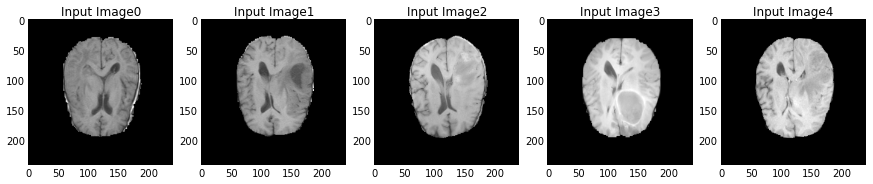

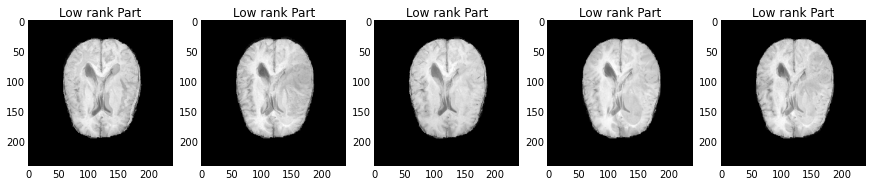

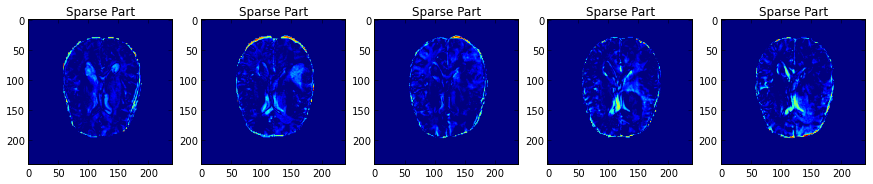

In [32]:
fig = plt.figure(figsize=(15,15))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    im = Y[:,i].reshape(x_dim,y_dim)
    im
    implot = imshow(im,cm.gray)
    plt.title('Input Image' + str(i))
    #plt.colorbar()
    #implot.set_clim(0,560)
    
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    implot =imshow(np.abs(low_rank[:,i].reshape(x_dim,y_dim)),cm.gray)
    plt.title('Low rank Part')
    #plt.colorbar()
    #implot.set_clim(0,560)

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i+1)
    implot = imshow(np.abs(sparse[:,i].reshape(x_dim,y_dim)))
    plt.title('Sparse Part')
    #plt.colorbar()
   # implot.set_clim(0,560)
    

In [33]:
r = np.arange(0.5,2.0,0.1)
print r
sparsity = zeros(r.size)
rank = zeros(r.size)
i = 0
for lamda in r:
    gamma = lamda * sqrt(float(Y.shape[1])/Y.shape[0])
    low_rank, sparse, n_iter,rank[i], sparsity[i] = recover(Y,gamma)
    i = i+1

[ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9]
[iter: 0000]: rank(P) = 0002, |C|_0 = 65125, crit=0.2714708399
[iter: 0010]: rank(P) = 0002, |C|_0 = 86057, crit=0.0008969874
[iter: 0020]: rank(P) = 0002, |C|_0 = 87410, crit=0.0000199139
[iter: 0030]: rank(P) = 0002, |C|_0 = 89225, crit=0.0000001336
[iter: 0000]: rank(P) = 0002, |C|_0 = 63269, crit=0.1841339173
[iter: 0010]: rank(P) = 0002, |C|_0 = 81469, crit=0.0016350613
[iter: 0020]: rank(P) = 0002, |C|_0 = 87082, crit=0.0000189544
[iter: 0030]: rank(P) = 0002, |C|_0 = 88516, crit=0.0000002478
[iter: 0000]: rank(P) = 0002, |C|_0 = 61012, crit=0.1412432547
[iter: 0010]: rank(P) = 0002, |C|_0 = 80243, crit=0.0019543452
[iter: 0020]: rank(P) = 0002, |C|_0 = 86038, crit=0.0000247205
[iter: 0030]: rank(P) = 0002, |C|_0 = 87071, crit=0.0000005078
[iter: 0000]: rank(P) = 0002, |C|_0 = 53793, crit=0.1336746838
[iter: 0010]: rank(P) = 0003, |C|_0 = 78766, crit=0.0021857599
[iter: 0020]: rank(P) = 0004, |C|_0 = 841

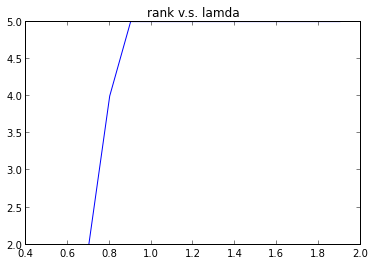

In [34]:
fig = plt.figure
plt.plot(r,rank)
plt.title('rank v.s. lamda')

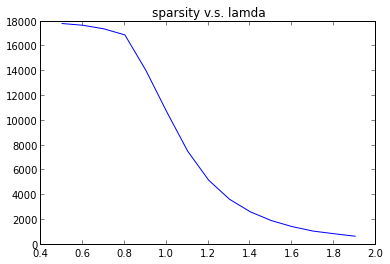

In [36]:
fig = plt.figure
plt.plot(r,sparsity/num_of_data)
plt.title('sparsity v.s. lamda')